In [75]:
import numpy as np
import matplotlib.pyplot as mp
import scipy.fftpack as fft
from jupyterthemes import jtplot

In [76]:
jtplot.reset()
mp.rcParams["text.usetex"] = True
mp.rcParams["font.family"] = "serif"
mp.rcParams["figure.figsize"] = (5*16/9, 5)
mp.rcParams["figure.dpi"] = 100

In [73]:
def read_csv(name, save=False):
    filename = name + ".csv"
    t, Vin, Vout, Vnull = np.genfromtxt(filename, delimiter=",", skip_header=2).T
    t += abs(t.min())
    rate = len(Vin)//t.max()
    
    mp.plot(t, Vin, "y-", label=r"$V_{in}$")
    mp.plot(t, Vout, "c-", label=r"$V_{out}$")
    
    c = fft.fft(Vout)
    f = np.argmax(abs(c))/len(Vin)*rate
    
    mp.grid(True)
    mp.xlabel("time, s")
    mp.ylabel("amplitude, V")
    mp.title(name)
    mp.legend(loc="upper right")
    
    if save:
        mp.savefig(name + ".png", dpi=300, bbox_inches="tight")
        
    mp.show()

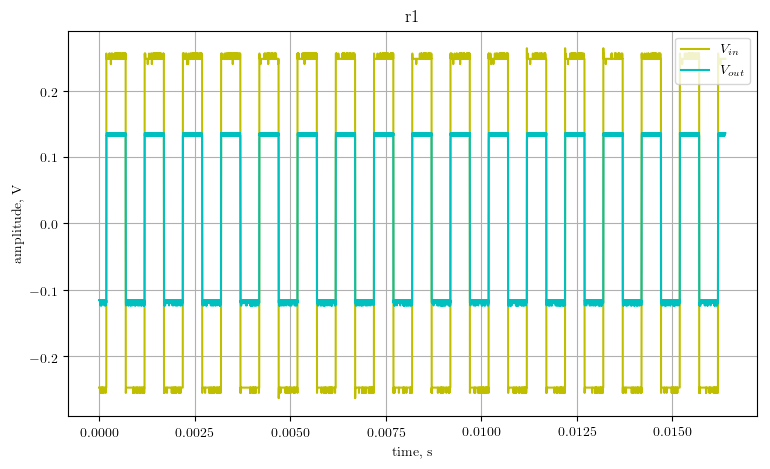

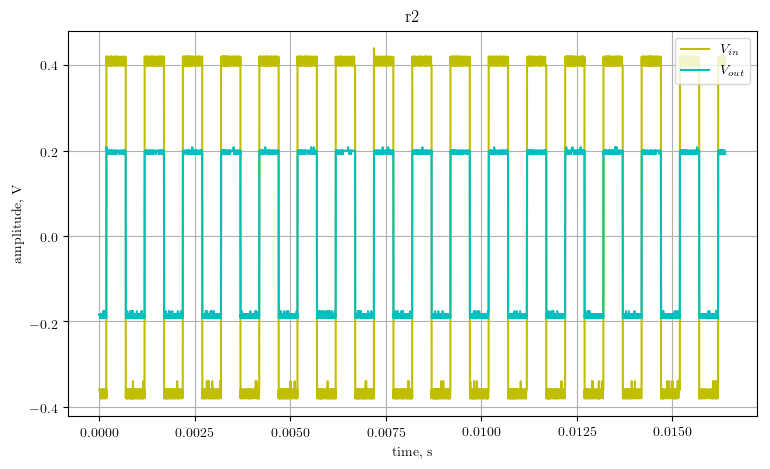

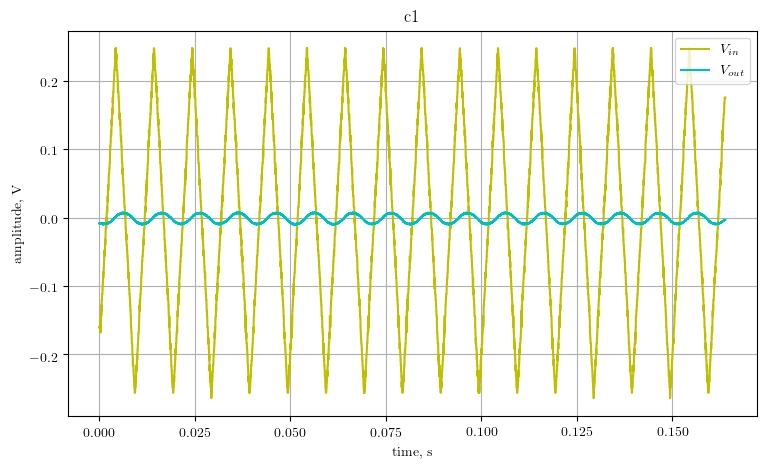

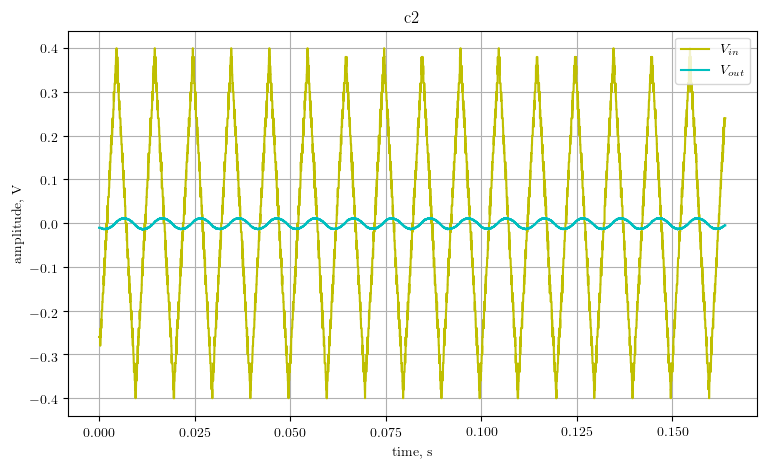

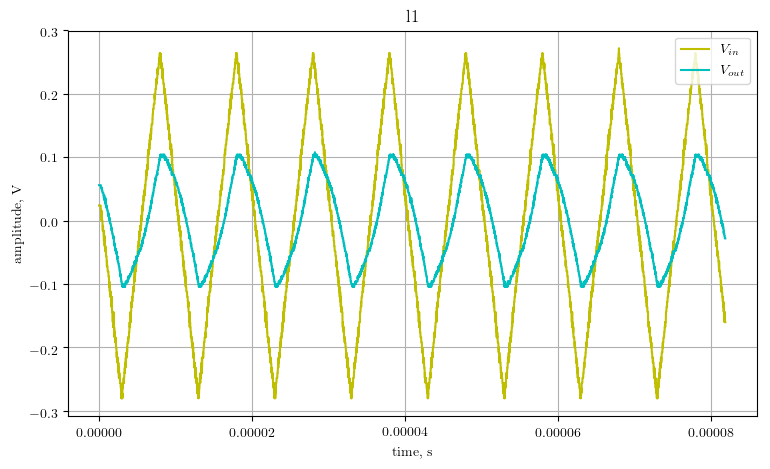

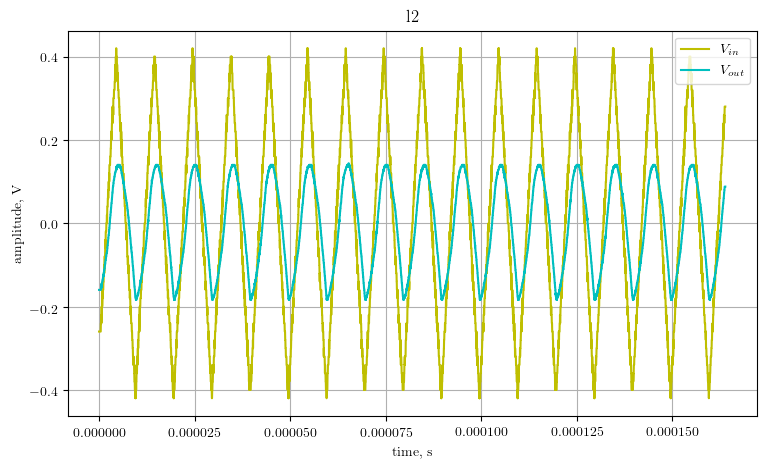

In [74]:
files = ["r1", "r2", "c1", "c2", "l1", "l2"]
for n in files:
    read_csv(n, True)